In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import cross_val_score
import eli5
import ast
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap


In [4]:
plasma_rf=pd.read_csv("R/GEO_count/TCGA_match.csv")

In [5]:
plasma_rf.iloc[:,0]

0      TCGA.22.4609.01A.21H.2124.13
1      TCGA.22.4609.11A.01H.2124.13
2      TCGA.22.5472.01A.01T.1634.13
3      TCGA.22.5472.11A.11H.2124.13
4      TCGA.22.5478.01A.01T.1634.13
                   ...             
177    TCGA.92.7340.11A.01H.2044.13
178    TCGA.92.7341.01A.31H.2044.13
179    TCGA.92.7341.11A.01H.2044.13
180    TCGA.93.7348.01A.21H.2038.13
181    TCGA.93.7348.11A.01H.2038.13
Name: Unnamed: 0, Length: 182, dtype: object

In [6]:
plasma_rf=plasma_rf.set_index('Unnamed: 0')

In [7]:
plasma_rf

,group,piR-hsa-100956,piR-hsa-1243473,piR-hsa-1248077,piR-hsa-1251177,piR-hsa-130959,piR-hsa-162229
Unnamed: 0,,,,,,,
TCGA.22.4609.01A.21H.2124.13,tumor,13.181652,3.180443,5.224541,7.016446,12.211603,7.165803
TCGA.22.4609.11A.01H.2124.13,normal,14.232016,2.589375,3.908182,6.955479,11.250004,6.605914
TCGA.22.5472.01A.01T.1634.13,tumor,13.191213,3.616602,6.355633,8.246808,12.562659,9.680425
TCGA.22.5472.11A.11H.2124.13,normal,16.019770,3.128829,3.236269,7.119025,10.622177,5.833237
TCGA.22.5478.01A.01T.1634.13,tumor,13.576808,6.447252,5.580621,9.952071,11.859376,8.645722
...,...,...,...,...,...,...,...
TCGA.92.7340.11A.01H.2044.13,normal,16.550489,2.924988,3.433761,6.790636,10.181639,5.847522
TCGA.92.7341.01A.31H.2044.13,tumor,13.812468,7.777539,5.890599,10.329125,11.450587,6.820804
TCGA.92.7341.11A.01H.2044.13,normal,15.398072,5.487051,3.144631,7.868494,10.668283,6.104942


In [8]:
X = plasma_rf.drop(columns=['group'])
X = X.drop(columns=['stage_2'])
print(X)

KeyError: "['stage_2'] not found in axis"

In [7]:
y = plasma_rf['group']
print(y)

Unnamed: 0
SRR14634232                     normal
SRR14634233                     normal
SRR14634234                     normal
SRR14634235                     normal
SRR14634236                     normal
                                 ...  
TCGA.O2.A52V.01A.31H.A263.13     tumor
TCGA.O2.A52W.01A.11H.A26V.13     tumor
TCGA.O2.A5IB.01A.11H.A27R.13     tumor
TCGA.S2.AA1A.01A.12H.A39B.13     tumor
TCGA.XC.AA0X.01A.32H.A404.13     tumor
Name: group, Length: 1370, dtype: object


In [8]:
def extract_stage_data(plasma_rf, stage):
    stage_data = plasma_rf[plasma_rf['stage_2'] == stage]
    y = stage_data['group']
    X = stage_data.drop(columns=['stage_2', 'group'])
    return X, y

stageI_X, stageI_y = extract_stage_data(plasma_rf, "Stage I")
stageII_X, stageII_y = extract_stage_data(plasma_rf, "Stage II")
stageIII_X, stageIII_y = extract_stage_data(plasma_rf, "Stage III")
stageIV_X, stageIV_y = extract_stage_data(plasma_rf, "Stage IV")


In [9]:
print(stageI_X.shape)
print(stageII_X.shape)
print(stageIII_X.shape)

(726, 6)
(384, 6)
(224, 6)


In [10]:
stageII_X

,piR-hsa-100956,piR-hsa-1243473,piR-hsa-1248077,piR-hsa-1251177,piR-hsa-130959,piR-hsa-162229
Unnamed: 0,,,,,,
SRR14634234,17.995454,3.860006,2.133882,4.218767,16.685255,12.103842
SRR14634238,17.867196,3.273832,-0.034247,4.762256,11.594053,10.700198
SRR14634239,18.110832,3.478450,-0.034247,2.156689,14.015447,9.925483
SRR14634242,17.794749,4.847126,-0.034247,5.459026,9.925006,8.872437
SRR14634244,18.673017,2.585983,-0.034247,3.606966,14.127997,9.111799
...,...,...,...,...,...,...
TCGA.NC.A5HR.01A.21H.A26V.13,14.505859,5.464597,4.540016,5.962963,14.066434,14.040104
TCGA.NJ.A55O.01A.11H.A263.13,16.738922,4.466231,4.701321,3.975882,14.170644,13.432432
TCGA.NK.A5CX.01A.11H.A26V.13,16.135005,8.364424,3.309344,7.208958,10.785831,11.368082


In [11]:
print(stageI_y.shape)
print(stageII_y.shape)
print(stageIII_y.shape)
print(stageIV_y.shape)

(726,)
(384,)
(224,)
(36,)


In [12]:
y.value_counts()

tumor     1128
normal     242
Name: group, dtype: int64

In [13]:
model = LogisticRegression()
model.fit(X, y)

y_pred_log = model.predict(X)
# Compute accuracy for validation and test sets
acc_log = accuracy_score(y, y_pred_log)

# Compute predicted probabilities for AUC calculation
y_prob_log = model.predict_proba(X)[:, 1]

# Compute AUC for validation and test sets
auc_log = roc_auc_score(y, y_prob_log)

#roc_curve
y_binary_log = label_binarize(y, classes=['normal', 'tumor']).flatten()
fpr_log, tpr_log, _ = roc_curve(y_binary_log, y_prob_log)

print(f"Accuracy: {acc_log:.4f}")
print(f"AUC: {auc_log:.4f}")

Accuracy: 0.9182
AUC: 0.9602


In [14]:
coefficients=model.coef_[0]
print(f'Coefficients: {coefficients}')
intercept = model.intercept_[0]
print(intercept)
scores = intercept + np.dot(X, coefficients)
#normaliaze the score
min_score = np.min(scores)
max_score = np.max(scores)
normalized_scores = (scores - min_score) / (max_score - min_score)
print(normalized_scores)

Coefficients: [-0.8727857   0.44274308  0.70496344  0.20817812  0.09461705  0.28667507]
6.119921477865222
[0.19795748 0.24431708 0.39813781 ... 0.66418041 0.6534172  0.62323171]


In [15]:
plasma_rf['risk_score']=normalized_scores
plasma_rf['prediction_probability']=y_prob_log
plasma_rf['prediction']=np.where(plasma_rf['risk_score']>0.5,'tumor','normal')
#plasma_rf.to_csv("/home/zgao/R/GEO_count/CHTN_heatmap.csv")

In [16]:
plasma_rf

,group,stage_2,piR-hsa-100956,piR-hsa-1243473,piR-hsa-1248077,piR-hsa-1251177,piR-hsa-130959,piR-hsa-162229,risk_score,prediction_probability,prediction
Unnamed: 0,,,,,,,,,,,
SRR14634232,normal,Stage III,18.782739,3.518208,-0.034247,5.206798,11.327519,9.896553,0.197957,0.023044,normal
SRR14634233,normal,Stage I,18.196035,5.229384,-0.034247,3.241535,10.867531,9.713173,0.244317,0.048219,normal
SRR14634234,normal,Stage II,17.995454,3.860006,2.133882,4.218767,16.685255,12.103842,0.398138,0.390284,normal
SRR14634235,normal,Stage I,16.273214,4.164237,2.507370,1.554428,13.564285,11.752927,0.455785,0.623508,normal
SRR14634236,normal,Stage IV,20.809048,5.467496,-0.034247,5.519175,10.790182,9.992796,0.145578,0.009846,normal
...,...,...,...,...,...,...,...,...,...,...,...
TCGA.O2.A52V.01A.31H.A263.13,tumor,Stage II,15.240118,5.237554,6.440686,4.960777,15.625713,13.192172,0.787292,0.997455,tumor
TCGA.O2.A52W.01A.11H.A26V.13,tumor,Stage I,14.918880,5.269869,4.799455,5.176347,16.987868,14.135501,0.761935,0.996138,tumor
TCGA.O2.A5IB.01A.11H.A27R.13,tumor,Stage III,14.904843,8.113463,1.886160,6.741590,15.734722,10.519236,0.664180,0.980939,tumor


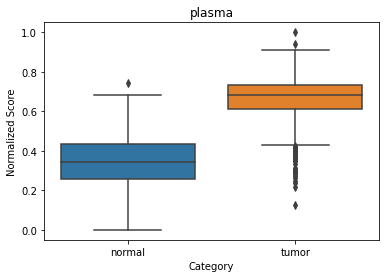

In [17]:
sns.boxplot(x='group', y='risk_score', data=plasma_rf)
plt.title('plasma')
plt.xlabel('Category')
plt.ylabel('Normalized Score')
plt.show()

In [18]:
X = plasma_rf[['risk_score']].values  # Extracting as 2D array
y = plasma_rf['group'].values  # Extracting as 1D array

# Initialize and fit the model
model = LogisticRegression()
model.fit(X, y)

y_pred_log = model.predict(X)
# Compute accuracy for validation and test sets
acc_log = accuracy_score(y, y_pred_log)

# Compute predicted probabilities for AUC calculation
y_prob_log = model.predict_proba(X)[:, 1]

# Compute AUC for validation and test sets
auc_log = roc_auc_score(y, y_prob_log)

#roc_curve
y_binary_log = label_binarize(y, classes=['normal', 'tumor']).flatten()
fpr_log, tpr_log, _ = roc_curve(y_binary_log, y_prob_log)

print(f"Accuracy: {acc_log:.4f}")
print(f"AUC: {auc_log:.4f}")

Accuracy: 0.9095
AUC: 0.9602


In [19]:
#stage I
model_stageI = LogisticRegression()
model_stageI.fit(stageI_X, stageI_y)


stageI_y_pred_log = model_stageI.predict(stageI_X)
# Compute accuracy for validation and test sets
stageI_acc_log = accuracy_score(stageI_y, stageI_y_pred_log)

# Compute predicted probabilities for AUC calculation
stageI_y_prob_log = model_stageI.predict_proba(stageI_X)[:, 1]

# Compute AUC for validation and test sets
stageI_auc_log = roc_auc_score(stageI_y, stageI_y_prob_log)

#roc_curve
stageI_y_binary_log = label_binarize(stageI_y, classes=['normal', 'tumor']).flatten()
stageI_fpr_log, stageI_tpr_log, _ = roc_curve(stageI_y_binary_log, stageI_y_prob_log)

print(f"Accuracy: {stageI_acc_log:.4f}")
print(f"AUC: {stageI_auc_log:.4f}")

Accuracy: 0.9050
AUC: 0.9553


In [20]:
coefficients_stageI=model_stageI.coef_[0]
print(f'Coefficients: {coefficients_stageI}')
intercept_stageI = model_stageI.intercept_[0]
print(intercept_stageI)
scores_stageI = intercept_stageI + np.dot(stageI_X, coefficients_stageI)
#normaliaze the score
min_score_stageI = np.min(scores_stageI)
max_score_stageI = np.max(scores_stageI)
normalized_scores_stageI = (scores_stageI - min_score_stageI) / (max_score_stageI - min_score_stageI)
print(normalized_scores_stageI)

Coefficients: [-0.6908565   0.40885848  0.61098632  0.33022986  0.10991096  0.41930489]
1.218174186311786
[0.20976084 0.41239787 0.29196378 0.25871927 0.2815024  0.267713
 0.22460124 0.37499561 0.39641464 0.25026504 0.16483331 0.35515867
 0.53362521 0.3942535  0.30823016 0.39773848 0.26482946 0.68420095
 0.35855942 0.20493627 0.36030526 0.31163875 0.26037382 0.52545492
 0.15260499 0.31709983 0.53108046 0.39791933 0.52438298 0.07021091
 0.12656943 0.26053157 0.36251656 0.07498241 0.12766438 0.04155265
 0.1819804  0.12887983 0.30663066 0.47115149 0.35794342 0.47837908
 0.44852082 0.49819015 0.46317836 0.29792223 0.36658597 0.38948897
 0.70075803 0.67274805 0.69556321 0.5575501  0.53791405 0.85685018
 0.78417071 0.75061902 0.72629136 0.62747848 0.58129452 0.78593891
 0.71343545 0.46221181 0.71388114 0.68237832 0.72973758 0.70480612
 0.63229192 0.83111614 0.66891834 0.77557633 0.72096273 0.56020458
 0.69238367 0.7244004  0.57161266 0.72438703 0.55002748 0.66389355
 0.69358921 0.60738365 0.

In [21]:
stageI.loc[:, 'risk_score'] = normalized_scores_stageI
stageI.loc[:, 'prediction_probability'] = stageI_y_prob_log
stageI.loc[:, 'prediction'] = np.where(stageI['risk_score'] > 0.5, 'tumor', 'normal')
stageI.to_csv("/home/zgao/R/GEO_count/tissue_stageI.csv")

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [22]:
stageI

,group,stage_2,piR-hsa-100956,piR-hsa-1243473,piR-hsa-1248077,piR-hsa-1251177,piR-hsa-130959,piR-hsa-162229,risk_score,prediction_probability,prediction
Unnamed: 0,,,,,,,,,,,
SRR14634233,normal,Stage I,18.196035,5.229384,-0.034247,3.241535,10.867531,9.713173,0.209761,0.052261,normal
SRR14634235,normal,Stage I,16.273214,4.164237,2.507370,1.554428,13.564285,11.752927,0.412398,0.535568,normal
SRR14634237,normal,Stage I,18.064461,3.677508,2.637629,1.684687,13.962376,10.472625,0.291964,0.159163,normal
SRR14634240,normal,Stage I,17.530859,4.503862,-0.034247,4.301263,11.985297,9.948926,0.258719,0.103098,normal
SRR14634241,normal,Stage I,17.134913,5.161895,-0.034247,4.656789,11.859075,9.223246,0.281502,0.139263,normal
...,...,...,...,...,...,...,...,...,...,...,...
TCGA.O1.A52J.01A.11H.A263.13,tumor,Stage I,15.653603,3.386722,3.852794,4.451496,15.879819,13.759177,0.611322,0.957999,tumor
TCGA.O2.A52N.01A.11H.A26V.13,tumor,Stage I,15.632588,6.281925,4.295133,5.414260,13.900801,12.714646,0.686699,0.986048,tumor
TCGA.O2.A52W.01A.11H.A26V.13,tumor,Stage I,14.918880,5.269869,4.799455,5.176347,16.987868,14.135501,0.769606,0.995938,tumor


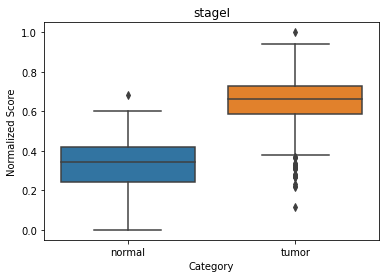

In [23]:
sns.boxplot(x='group', y='risk_score', data=stageI)
plt.title('stageI')
plt.xlabel('Category')
plt.ylabel('Normalized Score')
plt.show()

In [24]:
stageI_score_X = stageI[['risk_score']].values  # Extracting as 2D array
stageI_score_y = stageI['group'].values  # Extracting as 1D array

# Initialize and fit the model
model_stageI_score = LogisticRegression()
model_stageI_score.fit(stageI_score_X, stageI_score_y)

stageI_score_y_pred_log = model_stageI_score.predict(stageI_score_X)
# Compute accuracy for validation and test sets
stageI_score_acc_log = accuracy_score(stageI_score_y, stageI_score_y_pred_log)

# Compute predicted probabilities for AUC calculation
stageI_score_y_prob_log = model_stageI_score.predict_proba(stageI_score_X)[:, 1]

# Compute AUC for validation and test sets
stageI_score_auc_log = roc_auc_score(stageI_score_y, stageI_score_y_prob_log)

#roc_curve
stageI_score_y_binary_log = label_binarize(stageI_score_y, classes=['normal', 'tumor']).flatten()
stageI_score_fpr_log, stageI_score_tpr_log, _ = roc_curve(stageI_score_y_binary_log, stageI_score_y_prob_log)

print(f"Accuracy: {stageI_score_acc_log:.4f}")
print(f"AUC: {stageI_score_auc_log:.4f}")

Accuracy: 0.8829
AUC: 0.9553


In [25]:
#stage II
model_stageII = LogisticRegression()
model_stageII.fit(stageII_X, stageII_y)


stageII_y_pred_log = model_stageII.predict(stageII_X)
# Compute accuracy for validation and test sets
stageII_acc_log = accuracy_score(stageII_y, stageII_y_pred_log)

# Compute predicted probabilities for AUC calculation
stageII_y_prob_log = model_stageII.predict_proba(stageII_X)[:, 1]

# Compute AUC for validation and test sets
stageII_auc_log = roc_auc_score(stageII_y, stageII_y_prob_log)

#roc_curve
stageII_y_binary_log = label_binarize(stageII_y, classes=['normal', 'tumor']).flatten()
stageII_fpr_log, stageII_tpr_log, _ = roc_curve(stageII_y_binary_log, stageII_y_prob_log)

print(f"Accuracy: {stageII_acc_log:.4f}")
print(f"AUC: {stageII_auc_log:.4f}")

coefficients_stageII=model_stageII.coef_[0]
print(f'Coefficients: {coefficients_stageII}')
intercept_stageII = model_stageII.intercept_[0]
print(intercept_stageII)
scores_stageII = intercept_stageII + np.dot(stageII_X, coefficients_stageII)
#normaliaze the score
min_score_stageII = np.min(scores_stageII)
max_score_stageII = np.max(scores_stageII)
normalized_scores_stageII = (scores_stageII - min_score_stageII) / (max_score_stageII - min_score_stageII)
print(normalized_scores_stageII)

Accuracy: 0.9401
AUC: 0.9635
Coefficients: [-1.23407536  0.51689503  0.81317144 -0.0267524  -0.13263403  0.32902882]
15.009525039229988
[0.3824852  0.28593548 0.2463153  0.31440966 0.16289254 0.41476752
 0.41150838 0.23090118 0.49355517 0.54061597 0.49907816 0.07476363
 0.31637889 0.39537453 0.48550768 0.51619025 0.47682173 0.45858431
 0.57189787 0.75569163 0.68714434 0.61644334 0.83106059 0.60727077
 0.75500233 0.71569888 0.80926668 0.7985137  0.78196149 0.56020107
 0.75261869 0.70579193 0.40195356 0.48053156 0.29801645 0.33823059
 0.26183789 0.2681889  0.39413962 0.40793925 0.57374936 0.29323804
 0.49126783 0.64063107 0.40504823 0.69357681 0.60155455 0.58102582
 0.61697941 0.54165066 0.59820492 0.73474332 0.79324801 0.78217526
 0.69765956 0.68581507 0.72530489 0.82056247 0.2576047  0.55455953
 0.27282641 0.6064605  0.45911954 0.61784386 0.28914352 0.78058241
 0.19459084 0.91337053 0.28844332 0.79431362 0.79405923 0.44934582
 0.5521055  0.79569582 0.7325013  0.77461298 0.78267993 0.72

In [26]:
stageII.loc[:, 'risk_score'] = normalized_scores_stageII
stageII.loc[:, 'prediction_probability'] = stageII_y_prob_log
stageII.loc[:, 'prediction'] = np.where(stageII['risk_score'] > 0.5, 'tumor', 'normal')
stageII.to_csv("/home/zgao/R/GEO_count/tissue_stageII.csv")

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [27]:
stageII_score_X = stageII[['risk_score']].values  # Extracting as 2D array
stageII_score_y = stageII['group'].values  # Extracting as 1D array

# Initialize and fit the model
model_stageII_score = LogisticRegression()
model_stageII_score.fit(stageII_score_X, stageII_score_y)

stageII_score_y_pred_log = model_stageII_score.predict(stageII_score_X)
# Compute accuracy for validation and test sets
stageII_score_acc_log = accuracy_score(stageII_score_y, stageII_score_y_pred_log)

# Compute predicted probabilities for AUC calculation
stageII_score_y_prob_log = model_stageII_score.predict_proba(stageII_score_X)[:, 1]

# Compute AUC for validation and test sets
stageII_score_auc_log = roc_auc_score(stageII_score_y, stageII_score_y_prob_log)

#roc_curve
stageII_score_y_binary_log = label_binarize(stageII_score_y, classes=['normal', 'tumor']).flatten()
stageII_score_fpr_log, stageII_score_tpr_log, _ = roc_curve(stageII_score_y_binary_log, stageII_score_y_prob_log)

print(f"Accuracy: {stageII_score_acc_log:.4f}")
print(f"AUC: {stageII_score_auc_log:.4f}")

Accuracy: 0.9141
AUC: 0.9635


In [28]:
model_stageIII = LogisticRegression()
model_stageIII.fit(stageIII_X, stageIII_y)


stageIII_y_pred_log = model_stageIII.predict(stageIII_X)
# Compute accuracy for validation and test sets
stageIII_acc_log = accuracy_score(stageIII_y, stageIII_y_pred_log)

# Compute predicted probabilities for AUC calculation
stageIII_y_prob_log = model_stageIII.predict_proba(stageIII_X)[:, 1]

# Compute AUC for validation and test sets
stageIII_auc_log = roc_auc_score(stageIII_y, stageIII_y_prob_log)

#roc_curve
stageIII_y_binary_log = label_binarize(stageIII_y, classes=['normal', 'tumor']).flatten()
stageIII_fpr_log, stageIII_tpr_log, _ = roc_curve(stageIII_y_binary_log, stageIII_y_prob_log)

print(f"Accuracy: {stageIII_acc_log:.4f}")
print(f"AUC: {stageIII_auc_log:.4f}")

coefficients_stageIII=model_stageIII.coef_[0]
print(f'Coefficients: {coefficients_stageIII}')
intercept_stageIII = model_stageIII.intercept_[0]
print(intercept_stageIII)
scores_stageIII = intercept_stageIII + np.dot(stageIII_X, coefficients_stageIII)
#normaliaze the score
min_score_stageIII = np.min(scores_stageIII)
max_score_stageIII = np.max(scores_stageIII)
normalized_scores_stageIII = (scores_stageIII - min_score_stageIII) / (max_score_stageIII - min_score_stageIII)
print(normalized_scores_stageIII)

Accuracy: 0.9554
AUC: 0.9825
Coefficients: [-1.60048228  0.34000225  0.90942808  0.13043735  0.30613654 -0.49651556]
24.929797538610224
[0.14719168 0.09563068 0.         0.4843036  0.26467261 0.47335997
 0.36671948 0.62735117 0.68833582 0.67352594 0.6644389  0.69388724
 0.7803709  0.13341632 0.45073887 0.20777063 0.32565808 0.22548357
 0.68954926 0.59846818 0.83903571 0.737297   0.75035945 0.19308781
 0.52036967 0.34983773 0.89842559 0.27211391 0.85370456 0.17330653
 0.61792682 0.41104143 0.78751967 0.32438245 0.66864314 0.38525991
 0.8502585  0.28353606 0.42399283 0.19876486 0.92778001 0.29186987
 0.5404076  0.44961095 0.50195349 0.19701386 0.92302514 0.63969772
 0.50789389 0.7332251  0.43624009 0.78493684 0.75566061 0.65967125
 0.66863479 0.61575429 0.56843041 0.79607885 0.91597058 0.75376102
 0.78919827 0.86462394 0.68468644 0.69204725 0.68788168 0.85944259
 0.80834098 0.35336588 0.85078154 0.70993887 0.78496189 0.74622062
 0.30036588 0.70997869 0.76045651 0.68195302 0.68515215 0.71

In [29]:
stageIII.loc[:, 'risk_score'] = normalized_scores_stageIII
stageIII.loc[:, 'prediction_probability'] = stageIII_y_prob_log
stageIII.loc[:, 'prediction'] = np.where(stageIII['risk_score'] > 0.5, 'tumor', 'normal')
stageIII.to_csv("/home/zgao/R/GEO_count/tissue_stageIII.csv")

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [30]:
stageIII_score_X = stageIII[['risk_score']].values  # Extracting as 2D array
stageIII_score_y = stageIII['group'].values  # Extracting as 1D array

# Initialize and fit the model
model_stageIII_score = LogisticRegression()
model_stageIII_score.fit(stageIII_score_X, stageIII_score_y)

stageIII_score_y_pred_log = model_stageIII_score.predict(stageIII_score_X)
# Compute accuracy for validation and test sets
stageIII_score_acc_log = accuracy_score(stageIII_score_y, stageIII_score_y_pred_log)

# Compute predicted probabilities for AUC calculation
stageIII_score_y_prob_log = model_stageIII_score.predict_proba(stageIII_score_X)[:, 1]

# Compute AUC for validation and test sets
stageIII_score_auc_log = roc_auc_score(stageIII_score_y, stageIII_score_y_prob_log)

#roc_curve
stageIII_score_y_binary_log = label_binarize(stageIII_score_y, classes=['normal', 'tumor']).flatten()
stageIII_score_fpr_log, stageIII_score_tpr_log, _ = roc_curve(stageIII_score_y_binary_log, stageIII_score_y_prob_log)

print(f"Accuracy: {stageIII_score_acc_log:.4f}")
print(f"AUC: {stageIII_score_auc_log:.4f}")

Accuracy: 0.9107
AUC: 0.9825


In [31]:
model_stageIV = LogisticRegression()
model_stageIV.fit(stageIV_X, stageIV_y)


stageIV_y_pred_log = model_stageIV.predict(stageIV_X)
# Compute accuracy for validation and test sets
stageIV_acc_log = accuracy_score(stageIV_y, stageIV_y_pred_log)

# Compute predicted probabilities for AUC calculation
stageIV_y_prob_log = model_stageIV.predict_proba(stageIV_X)[:, 1]

# Compute AUC for validation and test sets
stageIV_auc_log = roc_auc_score(stageIV_y, stageIV_y_prob_log)

#roc_curve
stageIV_y_binary_log = label_binarize(stageIV_y, classes=['normal', 'tumor']).flatten()
stageIV_fpr_log, stageIV_tpr_log, _ = roc_curve(stageIV_y_binary_log, stageIV_y_prob_log)

print(f"Accuracy: {stageIV_acc_log:.4f}")
print(f"AUC: {stageIV_auc_log:.4f}")

coefficients_stageIV=model_stageIV.coef_[0]
print(f'Coefficients: {coefficients_stageIV}')
intercept_stageIV = model_stageIV.intercept_[0]
print(intercept_stageIV)
scores_stageIV = intercept_stageIV + np.dot(stageIV_X, coefficients_stageIV)
#normaliaze the score
min_score_stageIV = np.min(scores_stageIV)
max_score_stageIV = np.max(scores_stageIV)
normalized_scores_stageIV = (scores_stageIV - min_score_stageIV) / (max_score_stageIV - min_score_stageIV)
print(normalized_scores_stageIV)

Accuracy: 0.9444
AUC: 1.0000
Coefficients: [-0.34875126  0.25870603  1.19545863  0.71478097  0.66150144 -0.19053834]
-6.43512174048507
[0.         0.25389969 0.70338495 0.26380092 0.88055369 0.72005158
 0.69579203 0.52458687 0.52870009 0.68494041 0.84030478 0.68381951
 0.92833239 1.         0.80676141 0.72527256 0.52217531 0.92513069
 0.31890323 0.70149463 0.61872255 0.29537318 0.40106551 0.47240696
 0.75244565 0.37735843 0.74123203 0.42601452 0.78337107 0.52445635
 0.37599046 0.34002141 0.76177322 0.96578033 0.60777078 0.74446105]


In [32]:
stageIV.loc[:, 'risk_score'] = normalized_scores_stageIV
stageIV.loc[:, 'prediction_probability'] = stageIV_y_prob_log
stageIV.loc[:, 'prediction'] = np.where(stageIV['risk_score'] > 0.5, 'tumor', 'normal')
stageIV.to_csv("/home/zgao/R/GEO_count/tissue_stageIV.csv")

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [33]:
stageIV_score_X = stageIV[['risk_score']].values  # Extracting as 2D array
stageIV_score_y = stageIV['group'].values  # Extracting as 1D array

# Initialize and fit the model
model_stageIV_score = LogisticRegression()
model_stageIV_score.fit(stageIV_score_X, stageIV_score_y)

stageIV_score_y_pred_log = model_stageIV_score.predict(stageIV_score_X)
# Compute accuracy for validation and test sets
stageIV_score_acc_log = accuracy_score(stageIV_score_y, stageIV_score_y_pred_log)

# Compute predicted probabilities for AUC calculation
stageIV_score_y_prob_log = model_stageIV_score.predict_proba(stageIV_score_X)[:, 1]

# Compute AUC for validation and test sets
stageIV_score_auc_log = roc_auc_score(stageIV_score_y, stageIV_score_y_prob_log)

#roc_curve
stageIV_score_y_binary_log = label_binarize(stageIV_score_y, classes=['normal', 'tumor']).flatten()
stageIV_score_fpr_log, stageIV_score_tpr_log, _ = roc_curve(stageIV_score_y_binary_log, stageIV_score_y_prob_log)

print(f"Accuracy: {stageIV_score_acc_log:.4f}")
print(f"AUC: {stageIV_score_auc_log:.4f}")

Accuracy: 0.8889
AUC: 1.0000


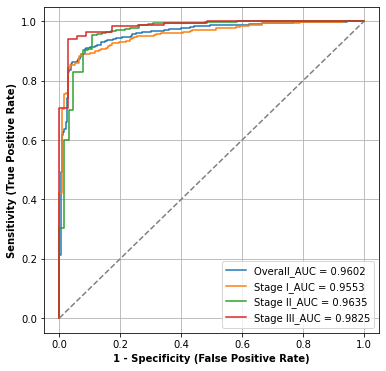

In [34]:
# score

plt.figure(figsize=(6, 6))

# plot ROC curve for the train set
plt.plot(fpr_log, tpr_log, label=f'Overall_AUC = {auc_log:.4f}')

#plot stageI curve
plt.plot(stageI_score_fpr_log, stageI_score_tpr_log,label=f'Stage I_AUC = {stageI_score_auc_log:.4f}')

#plot stageII curve
plt.plot(stageII_score_fpr_log, stageII_score_tpr_log,label=f'Stage II_AUC = {stageII_score_auc_log:.4f}')

#plot stageIII curve
plt.plot(stageIII_score_fpr_log, stageIII_score_tpr_log,label=f'Stage III_AUC = {stageIII_score_auc_log:.4f}')

#plot stageIV curve
#plt.plot(stageIV_score_fpr_log, stageIV_score_tpr_log,label=f'Stage IV_AUC = {stageIV_score_auc_log:.4f}')

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')
#plt.title('tissue_piR_hsa_1248077_logistic',fontweight='bold')
legend = plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('/home/zgao/R/GEO_count/plot_new/tissue_overallscore_logistic.pdf', format='pdf')
plt.show()


In [333]:
score_heatmap = np.transpose(plasma_rf.iloc[:, [7, 8]])

annotation_col = pd.DataFrame({'Tissue_type': plasma_rf['group'].values}, index=plasma_rf.index)
annotation_col['Prediction'] = plasma_rf['prediction'].values

In [334]:
annotation_col

,Tissue_type,Prediction
Unnamed: 0,,
TCGA.22.4609.01A.21H.2124.13,tumor,tumor
TCGA.22.4609.11A.01H.2124.13,normal,tumor
TCGA.22.5472.01A.01T.1634.13,tumor,tumor
TCGA.22.5472.11A.11H.2124.13,normal,normal
TCGA.22.5478.01A.01T.1634.13,tumor,tumor
...,...,...
TCGA.92.7340.11A.01H.2044.13,normal,normal
TCGA.92.7341.01A.31H.2044.13,tumor,tumor
TCGA.92.7341.11A.01H.2044.13,normal,tumor


<Figure size 720x360 with 0 Axes>

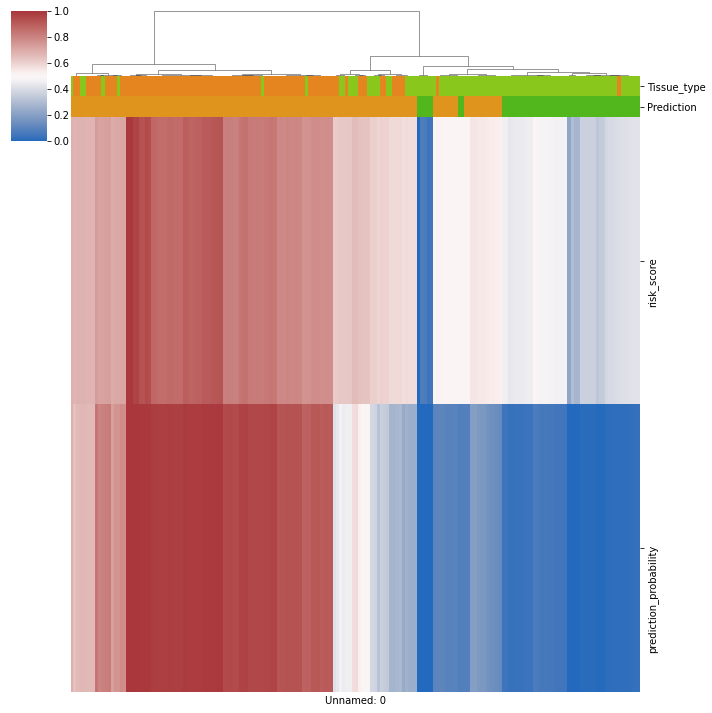

In [335]:
score_heatmap = np.transpose(plasma_rf.iloc[:, [7, 8]])

# Creating annotation_col as before
annotation_col = pd.DataFrame({'Tissue_type': plasma_rf['group'].values, 'Prediction': plasma_rf['prediction'].values}, index=plasma_rf.index)

# Creating a color map
ann_colors = {
    'Tissue_type': {
        'tumor': "#e48520",
        'normal': "#89c71d"
    },
    'Prediction': {
        'tumor': "#df951d",
        'normal': "#52b71d"
    }
}

# Replacing the labels with the colors
annotation_col_colors = annotation_col.replace(ann_colors)

# Plotting the heatmap
plt.figure(figsize=(10,5))
sns.clustermap(score_heatmap,
               row_cluster=False,
               col_cluster=True,
               dendrogram_ratio=0.1,
               method="ward",
               cmap="vlag",
               col_colors=annotation_col_colors,  # use the DataFrame of colors
               xticklabels=False,
               yticklabels=True)
plt.show()






In [35]:
plasma_rf2=pd.read_csv("R/GEO_count/CHTN_BC_rf.csv")

In [36]:
plasma_rf2.iloc[:,0]

0      RUSH_sample001
1      RUSH_sample002
2      RUSH_sample003
3      RUSH_sample004
4      RUSH_sample005
            ...      
228    RUSH_sample229
229    RUSH_sample230
230    RUSH_sample231
231    RUSH_sample232
232    RUSH_sample233
Name: Unnamed: 0, Length: 233, dtype: object

In [37]:
plasma_rf2=plasma_rf2.set_index('Unnamed: 0')

In [38]:
plasma_rf2

,group,piR-hsa-100956,piR-hsa-1243473,piR-hsa-1248077,piR-hsa-1251177,piR-hsa-130959,piR-hsa-162229
Unnamed: 0,,,,,,,
RUSH_sample001,normal,7.632547,6.912869,5.230415,7.599085,8.531000,6.031489
RUSH_sample002,normal,7.047996,6.646101,5.894568,8.654129,8.010076,5.789544
RUSH_sample003,normal,7.806511,6.537999,5.484230,7.892110,8.676535,6.018949
RUSH_sample004,normal,7.339643,6.695873,6.872975,8.386942,8.242664,6.488129
RUSH_sample005,normal,7.610784,6.864956,7.236400,8.190236,8.068534,6.261265
...,...,...,...,...,...,...,...
RUSH_sample229,normal,7.403964,7.403964,4.730305,8.212018,3.788973,3.788973
RUSH_sample230,normal,7.794829,7.595886,4.795851,8.230078,5.713732,4.648396
RUSH_sample231,normal,7.269353,7.775631,4.354415,8.264343,5.403794,4.354415


In [39]:
X2 = plasma_rf2.drop(columns=['group'])

In [40]:
y2 = plasma_rf2['group']

In [41]:
X2

,piR-hsa-100956,piR-hsa-1243473,piR-hsa-1248077,piR-hsa-1251177,piR-hsa-130959,piR-hsa-162229
Unnamed: 0,,,,,,
RUSH_sample001,7.632547,6.912869,5.230415,7.599085,8.531000,6.031489
RUSH_sample002,7.047996,6.646101,5.894568,8.654129,8.010076,5.789544
RUSH_sample003,7.806511,6.537999,5.484230,7.892110,8.676535,6.018949
RUSH_sample004,7.339643,6.695873,6.872975,8.386942,8.242664,6.488129
RUSH_sample005,7.610784,6.864956,7.236400,8.190236,8.068534,6.261265
...,...,...,...,...,...,...
RUSH_sample229,7.403964,7.403964,4.730305,8.212018,3.788973,3.788973
RUSH_sample230,7.794829,7.595886,4.795851,8.230078,5.713732,4.648396
RUSH_sample231,7.269353,7.775631,4.354415,8.264343,5.403794,4.354415


In [42]:
y2.value_counts()

tumor     117
normal    116
Name: group, dtype: int64

In [43]:
model2 = LogisticRegression()
model2.fit(X2, y2)

LogisticRegression()

In [44]:
y_pred_log2 = model2.predict(X2)

In [45]:
# Compute accuracy for validation and test sets
acc_log2 = accuracy_score(y2, y_pred_log2)

# Compute predicted probabilities for AUC calculation
y_prob_log2 = model2.predict_proba(X2)[:, 1]

# Compute AUC for validation and test sets
auc_log2 = roc_auc_score(y2, y_prob_log2)

#roc_curve
y_binary_log2 = label_binarize(y2, classes=['normal', 'tumor']).flatten()
fpr_log2, tpr_log2, _ = roc_curve(y_binary_log2, y_prob_log2)



print(f"Accuracy: {acc_log2:.4f}")
print(f"AUC: {auc_log2:.4f}")


Accuracy: 0.6481
AUC: 0.7084


In [46]:
coefficients2=model2.coef_[0]
print(f'Coefficients: {coefficients}')

Coefficients: [-0.8727857   0.44274308  0.70496344  0.20817812  0.09461705  0.28667507]


In [47]:
intercept2 = model2.intercept_[0]

In [48]:
scores2 = intercept2 + np.dot(X2, coefficients2)
#normaliaze the score
min_score2 = np.min(scores2)
max_score2 = np.max(scores2)
normalized_scores2 = (scores2 - min_score2) / (max_score2 - min_score2)

In [49]:
normalized_scores2

array([0.50428993, 0.5295706 , 0.50635965, 0.73855166, 0.80617644,
       0.58572112, 0.26632099, 0.42340721, 0.59235349, 0.65608721,
       0.588363  , 0.55654686, 0.24207583, 0.4655216 , 0.41558384,
       0.4032545 , 0.46148851, 0.59207368, 0.41732027, 0.55415951,
       0.3538126 , 0.66615463, 0.43294348, 0.47164965, 0.71982047,
       0.66939826, 1.        , 0.83767307, 0.83905927, 0.87239889,
       0.5369312 , 0.69728288, 0.5844676 , 0.33130526, 0.3343604 ,
       0.36518764, 0.57267035, 0.6536373 , 0.51532853, 0.68259486,
       0.65671945, 0.62949164, 0.65950664, 0.57369607, 0.66409168,
       0.56838635, 0.63841727, 0.50863703, 0.64918769, 0.70902969,
       0.67257406, 0.42915636, 0.36006001, 0.69669306, 0.35533334,
       0.49538721, 0.67985557, 0.46684968, 0.56611872, 0.51918854,
       0.52942225, 0.46006594, 0.50001879, 0.68524181, 0.65852274,
       0.57239743, 0.66199398, 0.406555  , 0.41337233, 0.45479309,
       0.58746787, 0.57680945, 0.29438338, 0.38463484, 0.44421

In [50]:
plasma_rf2['risk_score']=normalized_scores2
plasma_rf2['prediction_probability']=y_prob_log2
plasma_rf2['prediction']=np.where(plasma_rf2['risk_score']>0.5,'tumor','normal')


In [51]:
plasma_rf2

,group,piR-hsa-100956,piR-hsa-1243473,piR-hsa-1248077,piR-hsa-1251177,piR-hsa-130959,piR-hsa-162229,risk_score,prediction_probability,prediction
Unnamed: 0,,,,,,,,,,
RUSH_sample001,normal,7.632547,6.912869,5.230415,7.599085,8.531000,6.031489,0.504290,0.586595,tumor
RUSH_sample002,normal,7.047996,6.646101,5.894568,8.654129,8.010076,5.789544,0.529571,0.616413,tumor
RUSH_sample003,normal,7.806511,6.537999,5.484230,7.892110,8.676535,6.018949,0.506360,0.589064,tumor
RUSH_sample004,normal,7.339643,6.695873,6.872975,8.386942,8.242664,6.488129,0.738552,0.818029,tumor
RUSH_sample005,normal,7.610784,6.864956,7.236400,8.190236,8.068534,6.261265,0.806176,0.862466,tumor
...,...,...,...,...,...,...,...,...,...,...
RUSH_sample229,normal,7.403964,7.403964,4.730305,8.212018,3.788973,3.788973,0.287957,0.328500,normal
RUSH_sample230,normal,7.794829,7.595886,4.795851,8.230078,5.713732,4.648396,0.519217,0.604293,tumor
RUSH_sample231,normal,7.269353,7.775631,4.354415,8.264343,5.403794,4.354415,0.405911,0.466462,normal


In [52]:
plasma_rf2.to_csv("/home/zgao/R/GEO_count/CHTN_BC_heatmap.csv")

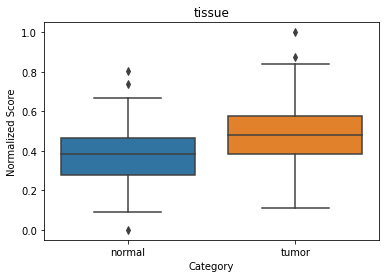

In [53]:
sns.boxplot(x='group', y='risk_score', data=plasma_rf2)
plt.title('tissue')
plt.xlabel('Category')
plt.ylabel('Normalized Score')
plt.show()

In [54]:
X2 = plasma_rf2[['risk_score']].values  # Extracting as 2D array
y2 = plasma_rf2['group'].values  # Extracting as 1D array

# Initialize and fit the model
model2 = LogisticRegression()
model2.fit(X2, y2)

LogisticRegression()

In [55]:
y_pred_log2 = model2.predict(X2)
# Compute accuracy for validation and test sets
acc_log2 = accuracy_score(y2, y_pred_log2)

# Compute predicted probabilities for AUC calculation
y_prob_log2 = model2.predict_proba(X2)[:, 1]

# Compute AUC for validation and test sets
auc_log2 = roc_auc_score(y2, y_prob_log2)

#roc_curve
y_binary_log2 = label_binarize(y2, classes=['normal', 'tumor']).flatten()
fpr_log2, tpr_log2, _ = roc_curve(y_binary_log2, y_prob_log2)

print(f"Accuracy: {acc_log2:.4f}")
print(f"AUC: {auc_log2:.4f}")

Accuracy: 0.6438
AUC: 0.7084


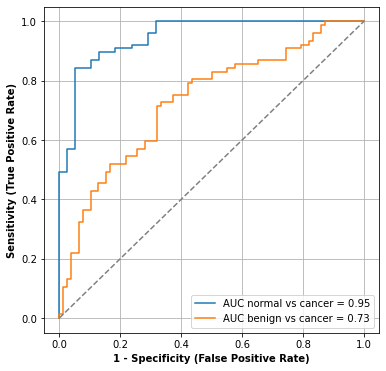

In [164]:
# Assuming fpr_val, tpr_val, and auc_val contain the FPR, TPR, and AUC for the validation set

plt.figure(figsize=(6, 6))

# plot ROC curve for the all set
plt.plot(fpr_log, tpr_log, label=f'AUC normal vs cancer = {auc_log:.2f}')

plt.plot(fpr_log2, tpr_log2, label=f'AUC benign vs cancer = {auc_log2:.2f}')

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')

legend = plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('/home/zgao/R/GEO_count/plot_new/CHTN_score_roc.pdf', format='pdf')
plt.show()
